In [1]:
import pandas as pd

In [2]:
netflix = pd.read_csv("netflix_titles.csv")
amazon_prime = pd.read_csv("amazon_prime_titles.csv")

In [4]:
netflix["platform"] = "Netflix"
amazon_prime["platform"] = "Amazon Prime"

In [7]:
amazon_prime.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,Not Rated,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon Prime
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,Not Rated,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon Prime
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,Not Rated,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazon Prime
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,Not Rated,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazon Prime


In [21]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix


In [9]:
netflix["country"].fillna("Unknown",inplace=True)
netflix["rating"].fillna("Not Rated",inplace=True)

amazon_prime["country"].fillna("Unknown",inplace=True)
amazon_prime["rating"].fillna("Not Rated",inplace=True)

In [11]:
combined = pd.concat([netflix, amazon_prime], ignore_index=True)

In [12]:
combined["listed_in"] = combined["listed_in"].str.split(", ")
combined = combined.explode("listed_in")


In [13]:
def convert_rating(rating):
    if rating in ["TV-MA", "R", "NC-17"]:
        return 5
    elif rating in ["TV-14", "PG-13"]:
        return 4
    elif rating in ["PG", "TV-PG"]:
        return 3
    elif rating in ["G", "TV-G"]:
        return 2
    else:
        return 1

combined["rating_score"] = combined["rating"].apply(convert_rating)

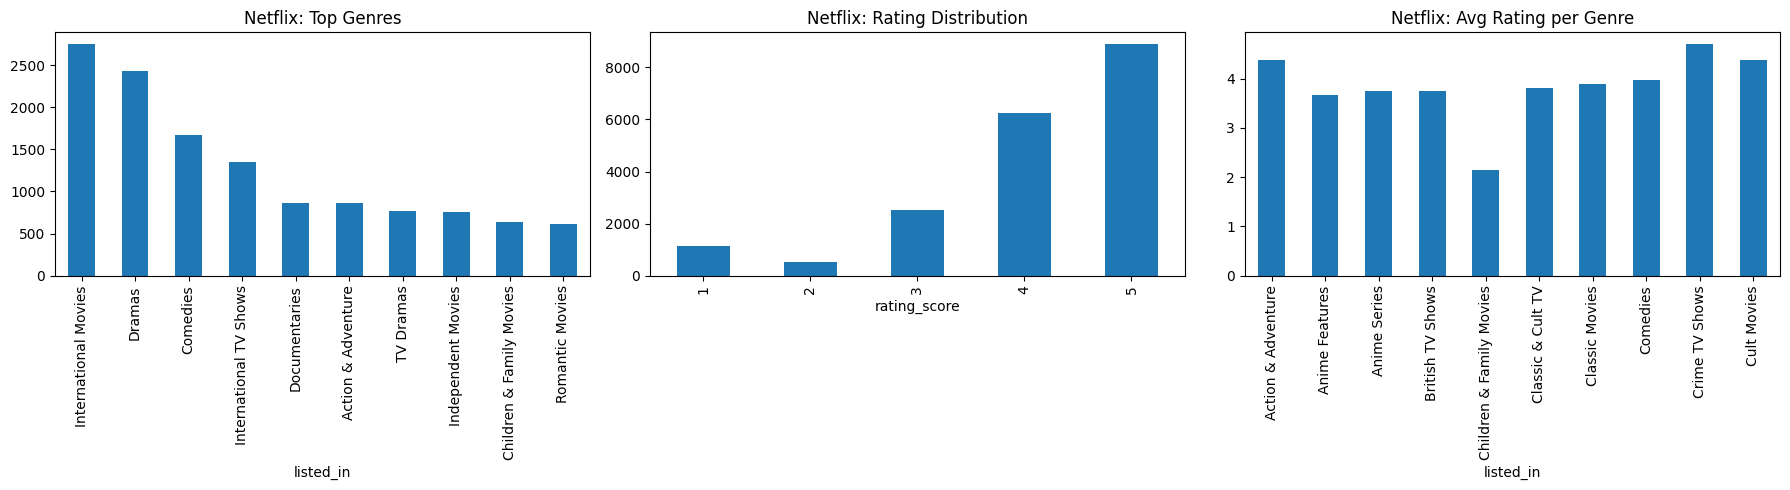

In [18]:
import matplotlib.pyplot as plt

netflix_df = combined[combined["platform"] == "Netflix"]

fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Genre
netflix_df["listed_in"].value_counts().head(10).plot(kind="bar", ax=axes[0])
axes[0].set_title("Netflix: Top Genres")

# Rating
netflix_df["rating_score"].value_counts().sort_index().plot(kind="bar", ax=axes[1])
axes[1].set_title("Netflix: Rating Distribution")

# Genre vs Rating
netflix_df.groupby("listed_in")["rating_score"].mean().head(10).plot(kind="bar", ax=axes[2])
axes[2].set_title("Netflix: Avg Rating per Genre")

plt.tight_layout()
plt.show()

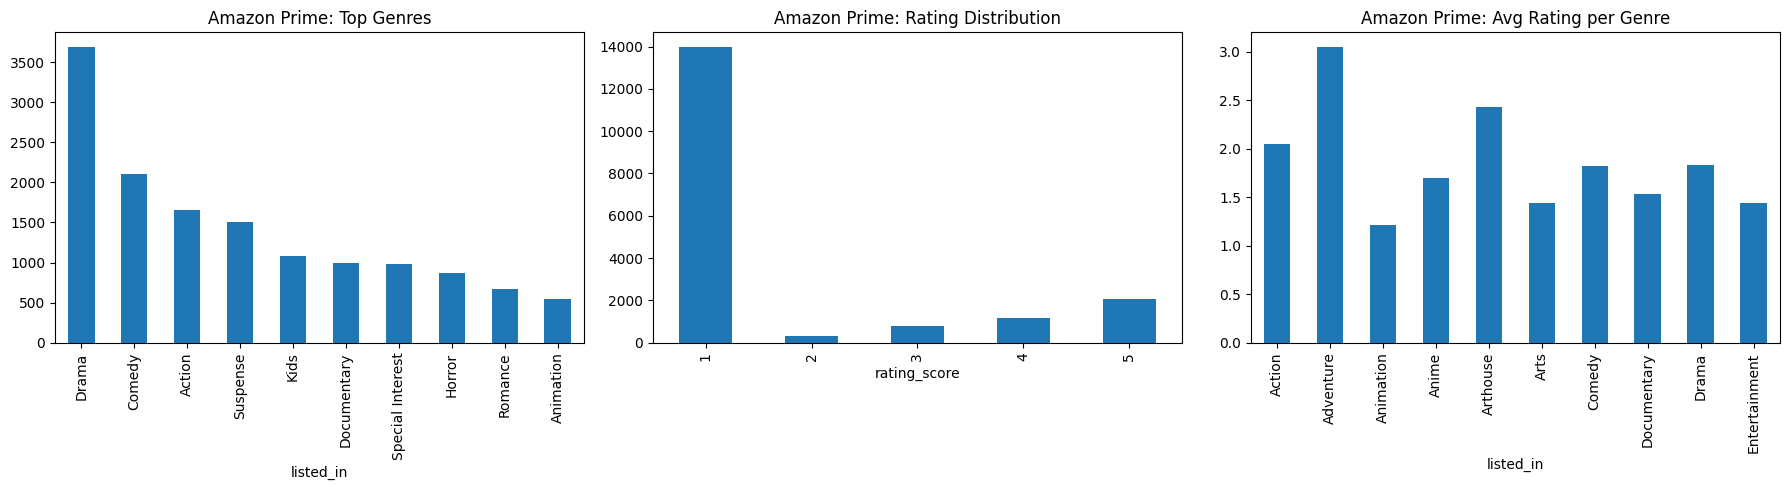

In [19]:
prime_df = combined[combined["platform"] == "Amazon Prime"]

fig, axes = plt.subplots(1, 3, figsize=(18,5))

prime_df["listed_in"].value_counts().head(10).plot(kind="bar", ax=axes[0])
axes[0].set_title("Amazon Prime: Top Genres")

prime_df["rating_score"].value_counts().sort_index().plot(kind="bar", ax=axes[1])
axes[1].set_title("Amazon Prime: Rating Distribution")

prime_df.groupby("listed_in")["rating_score"].mean().head(10).plot(kind="bar", ax=axes[2])
axes[2].set_title("Amazon Prime: Avg Rating per Genre")

plt.tight_layout()
plt.show()

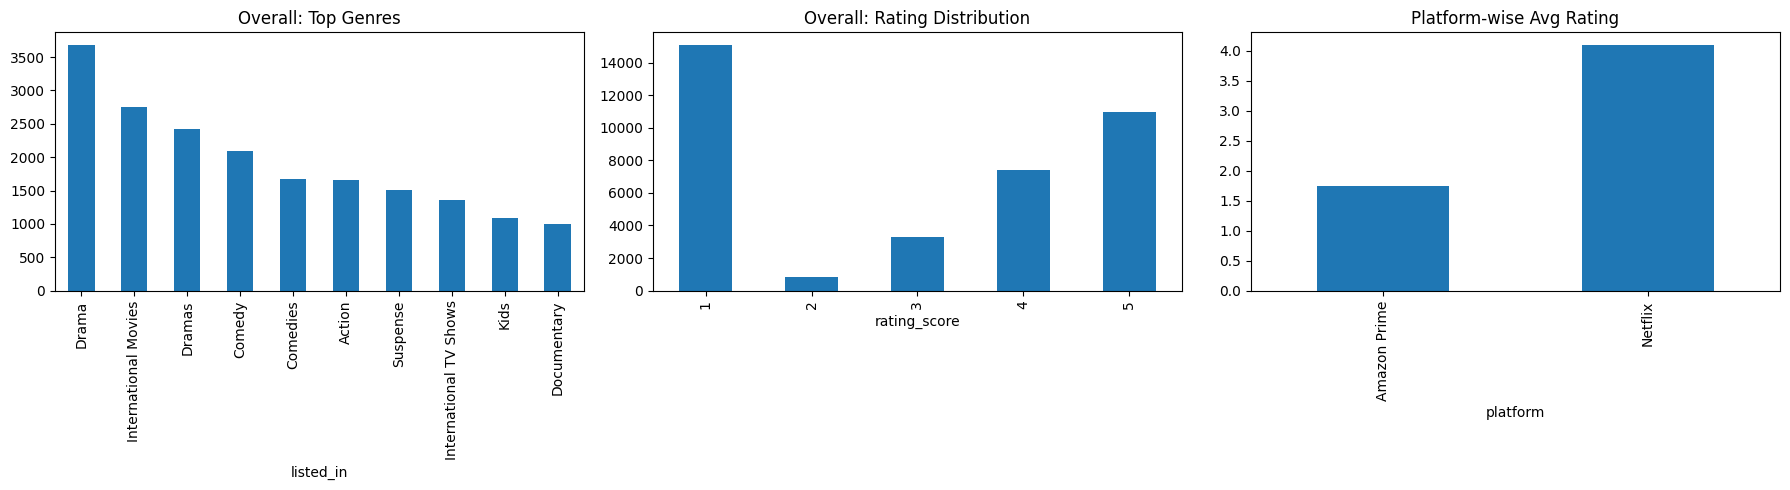

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

combined["listed_in"].value_counts().head(10).plot(kind="bar", ax=axes[0])
axes[0].set_title("Overall: Top Genres")

combined["rating_score"].value_counts().sort_index().plot(kind="bar", ax=axes[1])
axes[1].set_title("Overall: Rating Distribution")

combined.groupby("platform")["rating_score"].mean().plot(kind="bar", ax=axes[2])
axes[2].set_title("Platform-wise Avg Rating")

plt.tight_layout()
plt.show()